<a href="https://colab.research.google.com/github/Leonel-Ariel-Ruppel/READ-ME/blob/main/Maestr%C3%ADa_teor%C3%ADa_02_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/dieguito1331/cienciaDatos/blob/master/maestria/teoria/02 - Support Vector Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Support Vector Machines

SVM es un algoritmo supervizado de Machine learning. Este algoritmo sirve para problemas de clasificación y de regresión, no obstante, son más comunes para resolver problemas de clasificación. La idea de este algoritmo es encontrar un hiperplano que nos ayude a divir de la mejor forma el data set entre las dos clases. Todo nuevo punto que cae de un lado del hiperplato "dibujado" tendrá un label determinado, si cae del otro lado, se le definirá otro valor. Hasta ahora suena simple, no obstante, la selección de dicho hiperplano es la real complejidad de este algoritmo.
El hiperplano seleccionado deberá no sólo dividir al data set sino debe estar lo suficientemente alejado de los puntos más distantes de cada una de las clases.  
Los _support vectors_ o vectores soporte son los puntos de los datos más cercanos al hiperplano.  
El espacio existente entre el hiperplano y los puntos más cercanos, se denomina margen. La idea es encontrar un hiperplano que mejore la distancia de los márgenes para que cuando se quiera clasificar datos nuevamente los mismos exista el menor error posible.  
![img](https://miro.medium.com/max/575/1*6Om-ckghr9wdgBr0h8w5tw.png)

En la imagen anterior, podemos ver que ambas rectas pueden ser posibles soluciones ya que dividen el dataset de perfecto modo.  
Mirando la figura, la linea púrpura es la que posee los datos más alejados comparados con la línea verde.  
![](https://miro.medium.com/max/875/1*_wcGoFLpRaVqtrv2LzfcQQ.png)

Los márgenes duros o _hard margins_ se utilizan para que ninguna clasificación errónea sea permitida en el modelo (se da cuando los dataset son realmente linealmente separables). Para poder permitir estos errores, existe una forma para penalizar las clasificaciones erróneas para poder así controlar la cantidad de errores que puede soportar el algoritmo. Existe un hiperparámetro en el algoritmo denominado C, que controla esta penalidad, a mayor error, mayor es la penalidad que se le dará a una clasificación errónea, más chico, será menor la penalidad.  
Cuando se permiten clasificaciones erróneas, los márgenes se los denominan márgenes suaves o _soft margins_.

La distancia entre entre las observaciones y el hiperplano, se calcula como la distancia perpendicular de cada obsercación a dicho hiperplano.  
Como se menciona anteriormente, se pueden encontrar infinitos hiperplanos y cada hiperplano debería ser comparado contra todas las observaciones para poder obtener el de mayor margen. Por tal motivo se utilizan métodos de optimización y así lograr que el problema sea computacionalmente solucionado.  
En la gran mayoría de los problemas de la vida real, no existe una forma de separarlos linealmente, ya que no existe esta posibilidad hay herramientas que ayudan al SVM a poder resolver el problema en cuestion.  


### Kernels
En muchos casos, no es posible a priori realizar una separación lineal del espacio muestral, por tal motivo surgen algunos _trucos_ que ayudan a poder generar esta transformación. Estas transformaciones son generadas por una función denominada Kernel (K). En pocas palabras se devuelve el resultado de un dot product entre dos vectores creando un nuevo espacio dimensional distinto al original. Este nuevo espacio muestral nos ayuda a lograr dividir los datos en sus etiquetas. A esta transformación, se la denomina _kernel tricks_.  
![](https://miro.medium.com/max/875/1*NwhqamsvzBkUlYwSAubv5g.png)


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, classification_report

from google.colab import drive
import os

import matplotlib.pyplot as plt
%matplotlib inline



### Documentación de Scikit Learn

*La* documentación de la implementación del SVC de Sklearn se encuentra [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

## **Un ejemplo sencillo de SVM:**

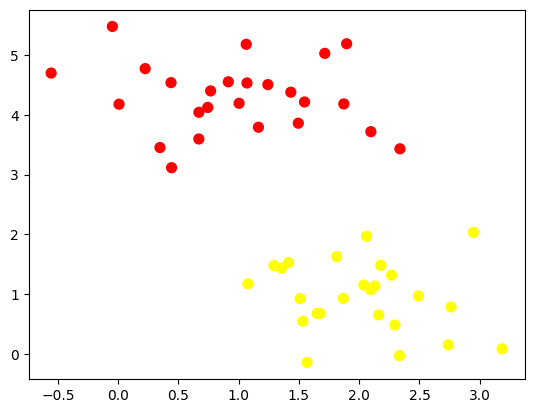

In [ ]:
from sklearn.datasets import make_blobs #make_blobs genera clusters
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'); #c: marker colors, mapea el color de los puntos de acuerdo al vector y

In [ ]:
X

array([[ 1.41281595,  1.5303347 ],
       [ 1.81336135,  1.6311307 ],
       [ 1.43289271,  4.37679234],
       [ 1.87271752,  4.18069237],
       [ 2.09517785,  1.0791468 ],
       [ 2.73890793,  0.15676817],
       [ 3.18515794,  0.08900822],
       [ 2.06156753,  1.96918596],
       [ 2.03835818,  1.15466278],
       [-0.04749204,  5.47425256],
       [ 1.71444449,  5.02521524],
       [ 0.22459286,  4.77028154],
       [ 1.06923853,  4.53068484],
       [ 1.53278923,  0.55035386],
       [ 1.4949318 ,  3.85848832],
       [ 1.1641107 ,  3.79132988],
       [ 0.74387399,  4.12240568],
       [ 2.29667251,  0.48677761],
       [ 0.44359863,  3.11530945],
       [ 0.91433877,  4.55014643],
       [ 1.67467427,  0.68001896],
       [ 2.26908736,  1.32160756],
       [ 1.5108885 ,  0.9288309 ],
       [ 1.65179125,  0.68193176],
       [ 2.49272186,  0.97505341],
       [ 2.33812285,  3.43116792],
       [ 0.67047877,  4.04094275],
       [-0.55552381,  4.69595848],
       [ 2.16172321,

In [ ]:
y #es el vector que marca el cluster al que pertenece cada punto

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

Podemos generar diferentes separadores que clasifican los datasets.  De acuerdo a cada separador, el punto X puede caer en diferentes grupos.

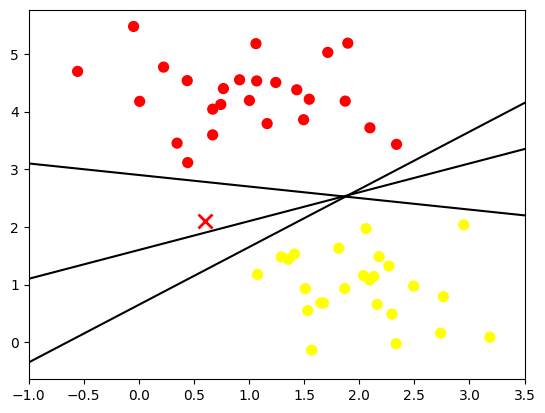

In [ ]:
xfit = np.linspace(-1, 3.5) #define el eje X entre -1 y 3.5, se incrementa por 0.50 por default
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k') #-k define que las lineas son negras solidas

plt.xlim(-1, 3.5);

In [ ]:
Agregamos el margen a los separadores.  El separador que maximiza el margen será el modelo óptimo.

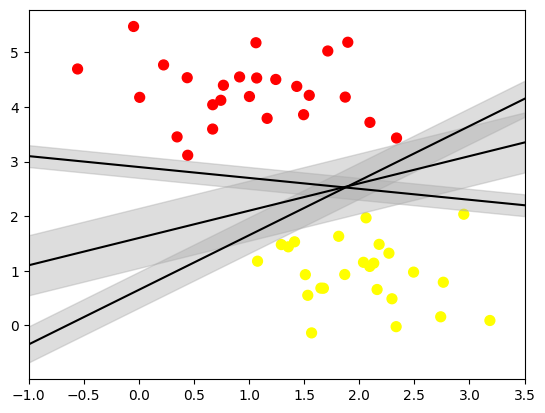

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

Vamos a visualizar el proceso de la maximización del margen:

In [ ]:
# el parámetro C determina si el margen es hard o soft.  cuanto mayor es C, más hard es el margen, es decir, no se permite que los puntos crucen a los límites del margen.
# Cuanto menor es C, más soft es el margen y los puntos sí se pueden cruzar entre los límites del margen.  El valor de C se determina de acuerdo al dataset usando cross-validation.
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
#creamos una función para visualizar los límites del resultado de SVM
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca() #get current axes. Definimos que se utilizan los mismos ejes del grafico.
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model, grid search
    x = np.linspace(xlim[0], xlim[1], 30) #genera un vector de 30 puntos equidistantes entre -1 y 3.5 en este caso.
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x) #genera una matriz de coordenadas o una grilla que cubre el area.
    xy = np.vstack([X.ravel(), Y.ravel()]).T #ravel() se usa para convertir vectores de 2 dimensiones a vectores de 1 dimension. vstack vuelve a crear un vector de 2 dimensiones.
    P = model.decision_function(xy).reshape(X.shape) #la funcion de decision recorre todos los puntos xy y los vuelve a poner en un vector de 2 dimensiones, es es la forma de X original.

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

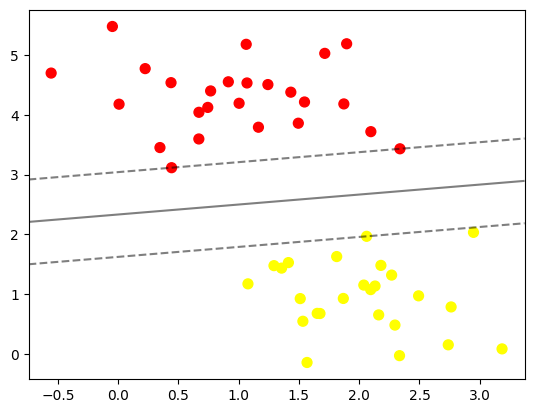

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Las líneas punteadas son las que maximizan el margen entre estos dos dataset.  Las líneas tocan algunos puntos, que son los denominados "Support vectors".  Para ver los support vectors simplemente llamamos al vector:

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

## Un caso no linealmente separable

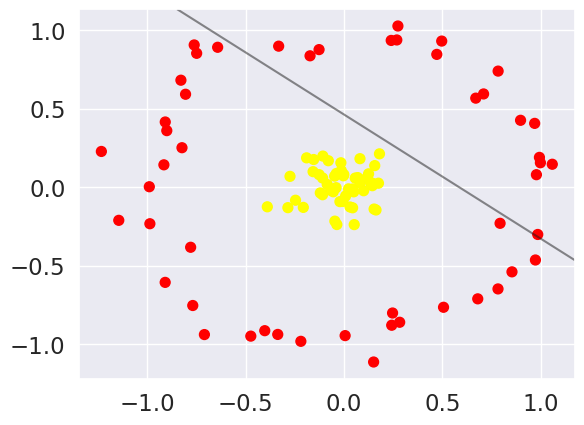

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

En este caso el separador lineal no clasifica los datos.  Entonces necesitamos proyectar los puntos a una dimension mayor de manera que un separador lineal sea funcional.  Entonces podemos usar una funcion radial basis (rbf) haciendo una proyeccion tridimensional centrado en el medio.  Entonces podemos usar un hiperplano para separar los dos clusters.  Y hacemos una transformacion del kernel en radial.

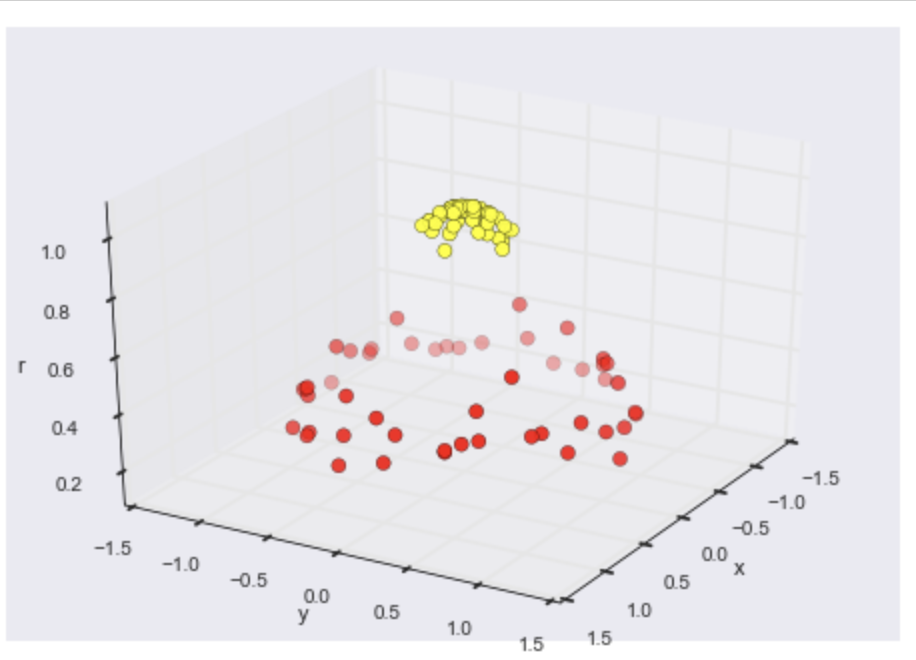

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

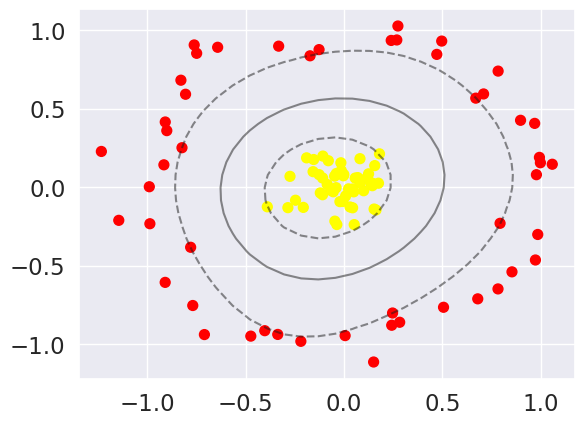

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

## **Modelo Titanic**

### Monto la carpeta de Drive

In [ ]:
#Levanto drive para poder almacenar los archivos
drive.mount("/content/drive")
contentFolder = "/content/drive/MyDrive/Austral - Data Mining"
if not os.path.exists(contentFolder):
    os.mkdir(contentFolder)

Mounted at /content/drive


### Levanto la base

In [ ]:
data = pd.read_csv("{}/titanicPreprocesada.txt".format(contentFolder), sep=";")

In [ ]:
#data["Survived"] = np.where(data.Survived == 0, -1, data.Survived) #para facilitar un calculo posterior

In [ ]:
X = data.drop(columns = ["index", "Survived"])
Y = data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
svclassifier = SVC(kernel='linear', probability = False).fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

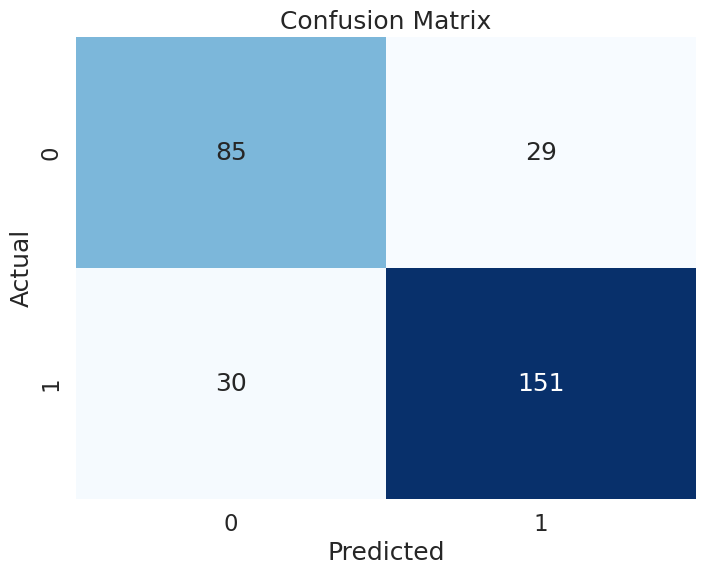

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(8,6))
sns.set(font_scale = 1.5)
confusion_matrix=confusion_matrix(y_test, y_pred, labels=[1,0])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy_1 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_1}")

Accuracy: 0.8


In [ ]:
report_1 = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       181
           1       0.74      0.75      0.74       114

    accuracy                           0.80       295
   macro avg       0.79      0.79      0.79       295
weighted avg       0.80      0.80      0.80       295



### Creo un dataset con la parte extra que no se uso para entrenar los modelos

In [ ]:
probabilities = data.loc[X_test.index][["Survived"]] #creo un dataframe denominado probabilities, traigo la columna survived de acuerdo al index.

In [ ]:
probabilities.value_counts()

Survived
0           181
1           114
dtype: int64

### Entreno el modelo

### Kernel Lineal

In [ ]:
svclassifier = SVC(kernel='linear', probability = True).fit(X_train, y_train) #El modelo calcula la probabilidad con los datos entrenados de X_train e y_train usando un kernel lineal.

### Obtengo las probabilidades
Con el modelo entrenado, obtengo las probabilidades de éxito (aquello que marqué cómo 1) de la base de test. Para ello uso la función predict_proba() del modelo creado

In [ ]:
svclassifierProbsLinear = svclassifier.predict_proba(X_test)[:,-1] #predecir la probabilidad de las clases del dataset X_test y traeme la ult col que es la prob.
probabilities["linear"] = svclassifierProbsLinear

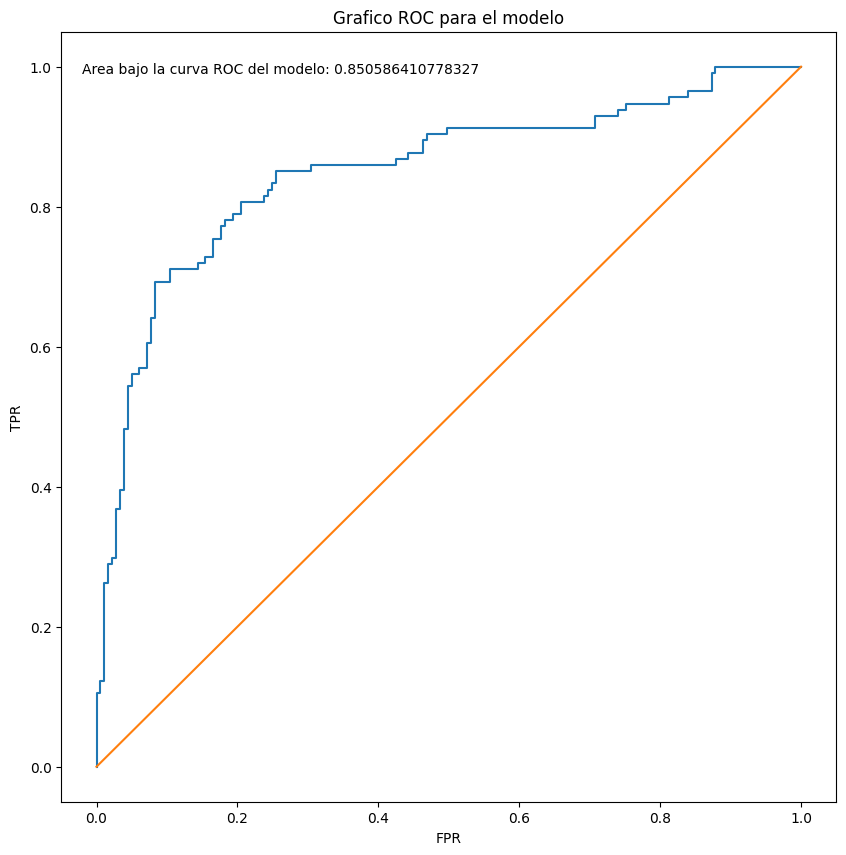

In [ ]:
score = "linear"
areaBajoCurvaRoc = roc_auc_score(probabilities.Survived, probabilities[score])
fpr, tpr, _ = roc_curve(probabilities.Survived, probabilities[score])
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el modelo")
plt.plot(fpr, tpr)
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.annotate('Area bajo la curva ROC del modelo: {}'.format(areaBajoCurvaRoc), (-0.02,0.99))
plt.show()

In [ ]:
score = "linear"
probabilities['{}decile'.format(score)] = pd.qcut(probabilities[score], 10, labels=False)
measures = probabilities.groupby('{}decile'.format(score)).agg({"Survived": ["sum","count"]})
measures

Survived      
                  sum count
lineardecile               
0                   4    30
1                   4    29
2                   2    30
3                   5    29
4                   2    30
5                  11    29
6                  12    29
7                  22    30
8                  24    29
9                  28    30

In [ ]:
probabilities.sort_values("linear")

,Survived,linear,lineardecile
165,0,0.067299,0
837,0,0.084241,0
137,0,0.087208,0
736,0,0.091130,0
82,0,0.097260,0
...,...,...,...
688,1,0.852029,9
578,1,0.852143,9
696,1,0.852195,9
534,1,0.852937,9


In [ ]:
score = "linear"
probabilities['{}decile'.format(score)] = pd.qcut(probabilities[score], 10, labels=False)
measures = probabilities.groupby('{}decile'.format(score)).agg({"Survived": ["sum","count"]})
measures.columns = ["Survived", "Cases"]
measures["not Survived"] = measures["Cases"] - measures["Survived"]
measures["% not Survived"] = (measures["not Survived"] / len(probabilities[probabilities.Survived == 0])).round(4) #dividido 191
measures["% Survived"] = (measures["Survived"] / len(X_test[probabilities.Survived == 1])).round(4) #dividido 114
measures = measures.sort_index(ascending = False)
a = measures[["% not Survived", "% Survived"]]\
                .cumsum()\
                .rename(columns={"% not Survived": "% not Survived cum.",
                                 "% Survived": "% Survived cum."}) #se usa \. para separar las lineas para una lectura mas facil.

measures = measures.join(a)
measures

,Survived,Cases,not Survived,% not Survived,% Survived,% not Survived cum.,% Survived cum.
lineardecile,,,,,,,
9,28,30,2,0.0110,0.2456,0.0110,0.2456
8,24,29,5,0.0276,0.2105,0.0386,0.4561
7,22,30,8,0.0442,0.1930,0.0828,0.6491
6,12,29,17,0.0939,0.1053,0.1767,0.7544
5,11,29,18,0.0994,0.0965,0.2761,0.8509
4,2,30,28,0.1547,0.0175,0.4308,0.8684
3,5,29,24,0.1326,0.0439,0.5634,0.9123
2,2,30,28,0.1547,0.0175,0.7181,0.9298
1,4,29,25,0.1381,0.0351,0.8562,0.9649


### Kernel Polinómico
La diferencia con el kernel lineal, es que la relación entre las variables independientes y las variables dependientes siguen una forma de polinomio de grado N.  
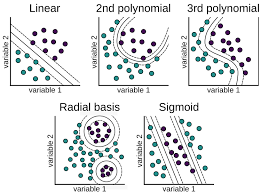


In [ ]:
svclassifierPoli = SVC(kernel='poly', probability = True).fit(X_train, y_train)


In [ ]:
svclassifierProbsPoli = svclassifierPoli.predict_proba(X_test)[:,-1]
probabilities["poli"] = svclassifierProbsPoli

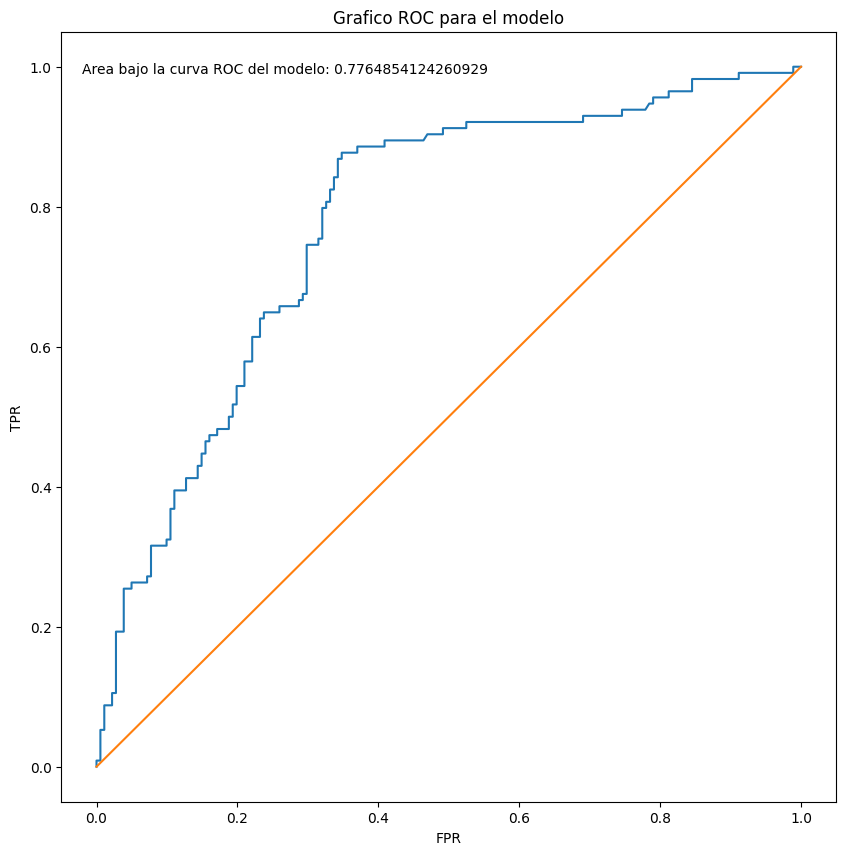

In [ ]:
score = "poli"
areaBajoCurvaRoc = roc_auc_score(probabilities.Survived, probabilities[score])
fpr, tpr, _ = roc_curve(probabilities.Survived, probabilities[score])
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el modelo")
plt.plot(fpr, tpr)
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.annotate('Area bajo la curva ROC del modelo: {}'.format(areaBajoCurvaRoc), (-0.02,0.99))
plt.show()

Kernel Radial

In [ ]:
svclassifierRadial = SVC(kernel='rbf', probability = True).fit(X_train, y_train)


In [ ]:
svclassifierProbsRadial = svclassifierRadial.predict_proba(X_test)[:,-1]
probabilities["radial"] = svclassifierProbsRadial

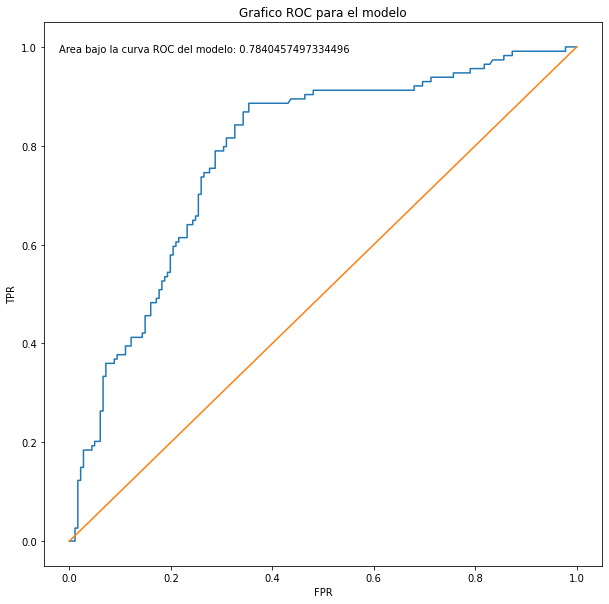

In [ ]:
score = "radial"
areaBajoCurvaRoc = roc_auc_score(probabilities.Survived, probabilities[score])
fpr, tpr, _ = roc_curve(probabilities.Survived, probabilities[score])
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el modelo")
plt.plot(fpr, tpr)
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.annotate('Area bajo la curva ROC del modelo: {}'.format(areaBajoCurvaRoc), (-0.02,0.99))
plt.show()